In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import seaborn as sns
import h5py
from scipy.stats import spearmanr
from itertools import combinations

In [2]:
output = loadmat('/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/output_2.mat')

In [3]:
output.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Folders', 'MaleSong_FliesKinematics', 'param'])

In [4]:
# note the order of the genotypes!
output['Folders']

array([[array(['pc2_tnt'], dtype='<U7'),
        array(['pc2_control'], dtype='<U11')]], dtype=object)

In [5]:
# columns 0-10
output['MaleSong_FliesKinematics']['SongFeatures'][0][0][0]

array([array(['Pulse amount'], dtype='<U12'),
       array(['Sine amount'], dtype='<U11'),
       array(['Bout amount'], dtype='<U11'),
       array(['Pulse onsets'], dtype='<U12'),
       array(['Sine onsets'], dtype='<U11'),
       array(['Bout onsets'], dtype='<U11'), array(['IPI'], dtype='<U3'),
       array(['Pulse duration'], dtype='<U14'),
       array(['Sine duration'], dtype='<U13'),
       array(['Bout duration'], dtype='<U13'),
       array(['Pause'], dtype='<U5')], dtype=object)

In [6]:
controlIDX = 1
tntIDX = 0
songftrs = output['MaleSong_FliesKinematics']['SongFeatures'][0][0][0]

# setting up dataframe for easier plotting
df = pd.DataFrame(columns=['control', 'tnt'])

for idx, (ftr_1, ftr_2) in enumerate(combinations([0,1,2,3,4,5,6,7,8,9,10],2)):

    ftr_1_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,ftr_1]
    ftr_2_control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,ftr_2]

    corr_c, _ = spearmanr(ftr_1_control, ftr_2_control)

    ftr_1_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,ftr_1]
    ftr_2_tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,ftr_2]

    corr_tnt, _ = spearmanr(ftr_1_tnt, ftr_2_tnt)

    df.loc[len(df.index)] = [corr_c, corr_tnt]


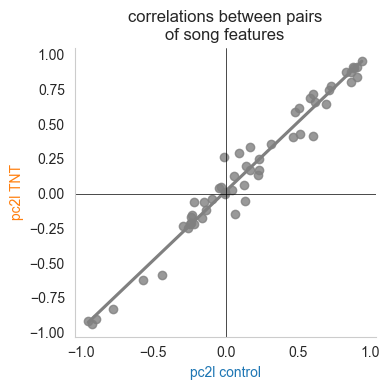

In [19]:
plt.figure(figsize=(4,4))
sns.regplot(data=df, x='control', y='tnt', scatter=True, ci=None, color='gray')
plt.grid(False)
plt.axvline(0, c='k', lw=0.5)
plt.axhline(0, c='k', lw=0.5)
plt.xlabel('pc2l control',c='tab:blue')
plt.ylabel('pc2l TNT', c='tab:orange')
sns.despine()
plt.title('correlations between pairs\nof song features')
plt.tight_layout()
plt.savefig(rf'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots/supp_allftrs_corr.pdf')


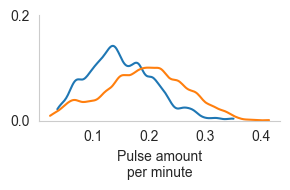

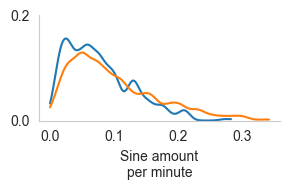

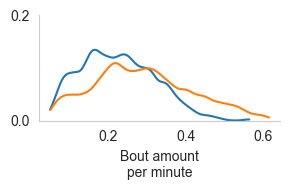

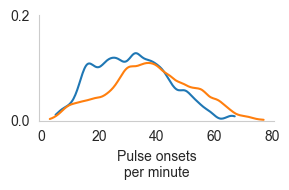

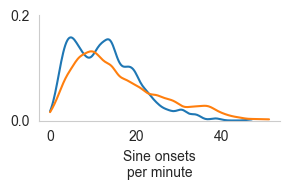

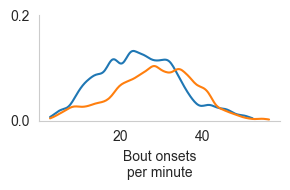

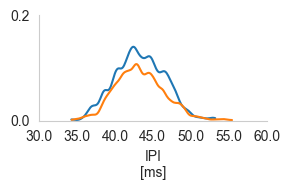

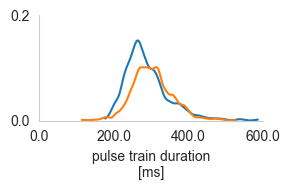

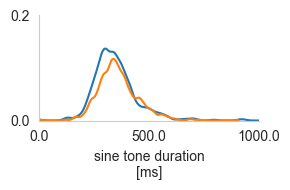

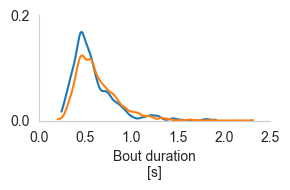

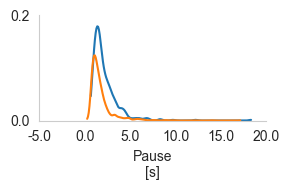

In [20]:
controlIDX = 1
tntIDX = 0
songftrs = output['MaleSong_FliesKinematics']['SongFeatures'][0][0][0]

for idx, ftr in enumerate(songftrs):
    control = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][controlIDX][:,idx]
    tnt = output['MaleSong_FliesKinematics']['MaleSong_FemaleSpeed_Binned'][0][tntIDX][:,idx]
    fig = plt.figure(figsize=(3,2))
    ax = fig.add_subplot(111)
    c_plot = sns.histplot(control, kde=True, stat='probability', ax=ax, kde_kws={'bw_adjust':0.5})
    for bar in c_plot.patches:
        bar.set_facecolor('w')
    t_plot = sns.histplot(tnt, kde=True, stat='probability', ax=ax, kde_kws={'bw_adjust':0.5})
    for bar in t_plot.patches:
        bar.set_facecolor('w')
    plt.grid(False)
    sns.despine()
    if idx<6:
        plt.xlabel(ftr[0]+'\nper minute')
    elif idx<9:
        ax.set_xticks(ax.get_xticks(), labels=ax.get_xticks()/10)
        plt.xlabel(ftr[0]+'\n[ms]')

    else:
        ax.set_xticks(ax.get_xticks(), labels=ax.get_xticks()/10000)
        plt.xlabel(ftr[0]+'\n[s]')

    plt.ylabel('')
    plt.yticks([0,0.2])

    if ftr[0]=='Sine duration':
        ax.set_xlim(0,10000)
        ax.set_xlabel('sine tone duration\n[ms]')

    if ftr[0]=='Pulse duration':
        ax.set_xlim(0,6000)
        ax.set_xlabel('pulse train duration\n[ms]')
    plt.tight_layout()
    plt.savefig(rf'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots/supp_{ftr[0]}.pdf')

In [13]:
metadata = pd.read_csv(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/metadata.csv', index_col=0)

In [14]:
metadata.head()

,expt,rig,exptName,exptDate,maleGT,maleDOB,maleAge,femaleGT,femaleDOB,femaleAge,cop,copFrame,exptpath,songpath,datapath
6,20230515_130717,left,20230515_130717left,2023-05-15,NM91,2023-05-10,5,pc2_tnt,2023-05-11,4,1,47470.0,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...
7,20230515_130717,right,20230515_130717right,2023-05-15,NM91,2023-05-11,4,pc2_control,2023-05-11,4,1,102841.0,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...
8,20230515_162806,left,20230515_162806left,2023-05-15,NM91,2023-05-11,4,pc2_tnt,2023-05-10,5,0,NaN,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...
9,20230515_162806,right,20230515_162806right,2023-05-15,NM91,2023-05-10,5,pc2_control,2023-05-10,5,1,11021.0,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...
10,20230516_110613,left,20230516_110613left,2023-05-16,NM91,2023-05-10,6,pc2_tnt,2023-05-10,6,0,NaN,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...,/run/user/1000/gvfs/smb-share:server=cup.pni.p...


In [15]:
control_cop = metadata['copFrame'][metadata['femaleGT']=='pc2_control']
tnt_cop = metadata['copFrame'][metadata['femaleGT']=='pc2_tnt']

In [16]:
control_cop.fillna(value=130000, inplace=True)
tnt_cop.fillna(value=130000, inplace=True)

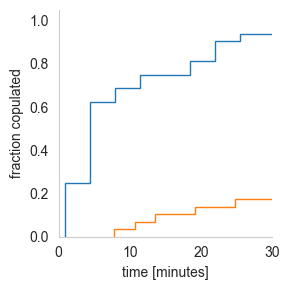

In [21]:
plt.figure(figsize=(3,3))
plt.hist(control_cop, cumulative=True, histtype='step', density=True)
plt.hist(tnt_cop, cumulative=True, histtype='step', density=True)
plt.grid(False)
plt.xlim(0,108000)
plt.ylabel('fraction copulated')
plt.xticks(np.arange(0,31*60*60,10*60*60), labels=np.arange(0,31,10))
plt.xlabel('time [minutes]')
sns.despine()
plt.tight_layout()
plt.savefig('/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots/supp_fraction_copulated.pdf')